In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

# Importing Deep Learning Libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam,SGD,RMSprop

In [2]:
train_data_gen = ImageDataGenerator(rescale=1./255)
test_data_gen = ImageDataGenerator(rescale=1./255)

In [3]:
tf.random.set_seed(42)
train_generator = train_data_gen.flow_from_directory('FER2013/train',
                                                    target_size=(64,64),
                                                    color_mode="grayscale",
                                                    batch_size=32,
                                                    class_mode='categorical',
                                                    seed = 42,
                                                    shuffle = True)

Found 28709 images belonging to 7 classes.


In [4]:
tf.random.set_seed(42)
test_generator = test_data_gen.flow_from_directory('FER2013/test',
                                                  target_size=(64,64),
                                                  color_mode="grayscale",
                                                  batch_size=32,
                                                  class_mode='categorical',
                                                  seed = 42)

Found 7178 images belonging to 7 classes.


In [5]:
test_dir = "FER2013/test"
train_dir = "FER2013/train"

IMAGE_SHAPE = (64,64)
BATCH_SIZE = 32

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(1/255.)
test_datagen = ImageDataGenerator(1/255.)
print("training_data")
training_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                   label_mode= "categorical",
                                                                   image_size= IMAGE_SHAPE,
                                                                   batch_size = BATCH_SIZE)

print("testing_data")
testing_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                   label_mode= "categorical",
                                                                   image_size= IMAGE_SHAPE,
                                                                   batch_size = BATCH_SIZE,
                                                                   shuffle = False)

training_data
Found 28709 files belonging to 7 classes.
testing_data
Found 7178 files belonging to 7 classes.


In [9]:
from keras.models import Sequential
from keras.layers import Conv2D, BatchNormalization, Activation, MaxPooling2D, Dropout, Flatten, Dense
from keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

# Define the number of classes
no_of_classes = 7

# Create the Sequential model
model_1 = Sequential()

# 1st Convolutional Layer
model_1.add(Conv2D(64, (3, 3), padding='same', input_shape=(64, 64, 1)))
model_1.add(BatchNormalization())
model_1.add(Activation('relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model_1.add(Dropout(0.25))

# 2nd Convolutional Layer
model_1.add(Conv2D(128, (3, 3), padding='same'))
model_1.add(BatchNormalization())
model_1.add(Activation('relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model_1.add(Dropout(0.25))

# 3rd Convolutional Layer
model_1.add(Conv2D(128, (3, 3), padding='same'))
model_1.add(BatchNormalization())
model_1.add(Activation('relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model_1.add(Dropout(0.25))

# 4th Convolutional Layer
model_1.add(Conv2D(512, (3, 3), padding='same'))
model_1.add(BatchNormalization())
model_1.add(Activation('relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model_1.add(Dropout(0.25))

#5th Convolutional Layer
model_1.add(Conv2D(512, (3, 3), padding='same'))
model_1.add(BatchNormalization())
model_1.add(Activation('relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model_1.add(Dropout(0.25))

# Flatten the output from convolutional layers
model_1.add(Flatten())

# 1st Fully Connected Layer
model_1.add(Dense(256,kernel_regularizer=l2(0.001)))
model_1.add(BatchNormalization())
model_1.add(Activation('relu'))
model_1.add(Dropout(0.25))

# 2nd Fully Connected Layer
model_1.add(Dense(512,kernel_regularizer=l2(0.001)))
model_1.add(BatchNormalization())
model_1.add(Activation('relu'))
model_1.add(Dropout(0.25))

# Output Layer
model_1.add(Dense(no_of_classes, activation='softmax'))

# Compile the model
opt = Adam(learning_rate=0.001)
model_1.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary to view the architecture
model_1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 64, 64, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 64, 64, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 32, 32, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_6 (Activation)            │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_7 (Activation)            │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 8, 8, 512)           │         590,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 8, 8, 512)           │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_8 (Activation)            │ (None, 8, 8, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 3,840,391 (14.65 MB)

 Trainable params: 3,836,167 (14.63 MB)

 Non-trainable params: 4,224 (16.50 KB)

In [10]:
from tensorflow.keras.optimizers import RMSprop,SGD,Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# checkpoint = ModelCheckpoint("./model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')
checkpoint = ModelCheckpoint("./model.keras", monitor='val_acc', verbose=1, save_best_only=True, mode='max')


# early_stopping = EarlyStopping(monitor='val_loss',
#                           min_delta=0,
#                           patience=3,
#                           verbose=1,
#                           restore_best_weights=True
#                           )

early_stopping = EarlyStopping(monitor = "val_loss",
                               min_delta = 0,
                               patience = 20,
                               verbose = 1,
                               mode = "auto",
                               restore_best_weights = True)


reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

In [11]:
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

In [12]:
history_1 = model_1.fit(train_generator,
                       epochs=10,
                       validation_data=test_generator,
                       callbacks=callbacks_list)

Epoch 1/10


C:\Users\Tanisha\anaconda3\envs\env\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


898/898 ━━━━━━━━━━━━━━━━━━━━ 785s 863ms/step - accuracy: 0.2714 - loss: 2.6654 - val_accuracy: 0.4079 - val_loss: 2.0202 - learning_rate: 0.0010
Epoch 2/10


C:\Users\Tanisha\anaconda3\envs\env\Lib\site-packages\keras\src\callbacks\model_checkpoint.py:206: UserWarning: Can save best model only with val_acc available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)


898/898 ━━━━━━━━━━━━━━━━━━━━ 584s 650ms/step - accuracy: 0.4321 - loss: 1.8823 - val_accuracy: 0.4946 - val_loss: 1.6139 - learning_rate: 0.0010
Epoch 3/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 570s 635ms/step - accuracy: 0.4972 - loss: 1.5687 - val_accuracy: 0.5139 - val_loss: 1.4659 - learning_rate: 0.0010
Epoch 4/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 569s 634ms/step - accuracy: 0.5290 - loss: 1.4224 - val_accuracy: 0.4925 - val_loss: 1.4385 - learning_rate: 0.0010
Epoch 5/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 566s 630ms/step - accuracy: 0.5499 - loss: 1.3676 - val_accuracy: 0.5081 - val_loss: 1.4360 - learning_rate: 0.0010
Epoch 6/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 565s 630ms/step - accuracy: 0.5597 - loss: 1.3277 - val_accuracy: 0.5199 - val_loss: 1.4286 - learning_rate: 0.0010
Epoch 7/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 566s 630ms/step - accuracy: 0.5744 - loss: 1.3079 - val_accuracy: 0.5610 - val_loss: 1.3314 - learning_rate: 0.0010
Epoch 8/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 566s 630ms/step - accuracy: 0.5931 

In [13]:
final_epoch = 20
history_2 = model_1.fit(train_generator,
                        epochs= final_epoch,
                        validation_data=test_generator,
                        callbacks=callbacks_list,
                        initial_epoch = history_1.epoch[-1])

Epoch 10/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 695s 772ms/step - accuracy: 0.6193 - loss: 1.2047 - val_accuracy: 0.5724 - val_loss: 1.3085 - learning_rate: 0.0010
Epoch 11/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 559s 622ms/step - accuracy: 0.6328 - loss: 1.1719 - val_accuracy: 0.5965 - val_loss: 1.2713 - learning_rate: 0.0010
Epoch 12/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 544s 606ms/step - accuracy: 0.6444 - loss: 1.1337 - val_accuracy: 0.6003 - val_loss: 1.2572 - learning_rate: 0.0010
Epoch 13/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 546s 608ms/step - accuracy: 0.6597 - loss: 1.1056 - val_accuracy: 0.5913 - val_loss: 1.2727 - learning_rate: 0.0010
Epoch 14/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 662s 737ms/step - accuracy: 0.6746 - loss: 1.0725 - val_accuracy: 0.6188 - val_loss: 1.2147 - learning_rate: 0.0010
Epoch 15/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 598s 665ms/step - accuracy: 0.6864 - loss: 1.0248 - val_accuracy: 0.6053 - val_loss: 1.2725 - learning_rate: 0.0010
Epoch 16/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 601s 669ms/step -

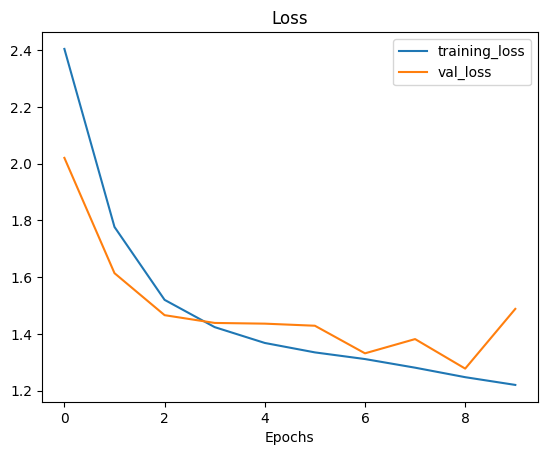

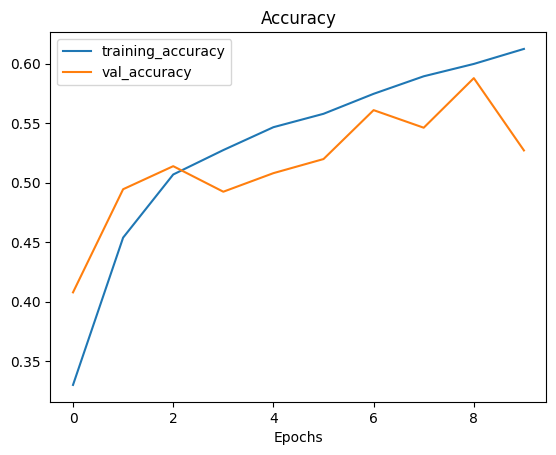

In [14]:
plot_loss_curves(history_1)

In [15]:
def compare_historys(original_history, new_history, initial_epochs=10):
    """
    Compares two model history objects.
    """
    # Get original history measurements
    acc = original_history.history["accuracy"]
    loss = original_history.history["loss"]

    print(len(acc))

    val_acc = original_history.history["val_accuracy"]
    val_loss = original_history.history["val_loss"]

    # Combine original history with new history
    total_acc = acc + new_history.history["accuracy"]
    total_loss = loss + new_history.history["loss"]

    total_val_acc = val_acc + new_history.history["val_accuracy"]
    total_val_loss = val_loss + new_history.history["val_loss"]

    print(len(total_acc))
    print(total_acc)

    # Make plots
    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(total_acc, label='Training Accuracy')
    plt.plot(total_val_acc, label='Validation Accuracy')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(2, 1, 2)
    plt.plot(total_loss, label='Training Loss')
    plt.plot(total_val_loss, label='Validation Loss')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.xlabel('epoch')
    plt.show()


10
21
[0.3301403820514679, 0.45389947295188904, 0.5069490671157837, 0.527465283870697, 0.5466926693916321, 0.5579435229301453, 0.5747326612472534, 0.5894666910171509, 0.5998467206954956, 0.6124560236930847, 0.6149291396141052, 0.6293148398399353, 0.6423769593238831, 0.6571458578109741, 0.6682573556900024, 0.67787104845047, 0.6908982992172241, 0.7058065533638, 0.7503222227096558, 0.7745654582977295, 0.7832038998603821]


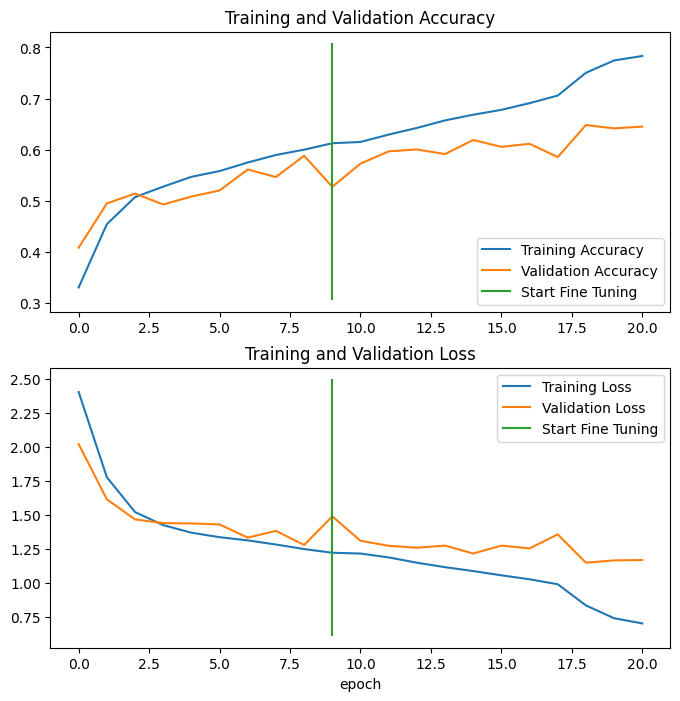

In [16]:
compare_historys(history_1, history_2, initial_epochs=10)

In [17]:
model_1.predict(test_generator)

225/225 ━━━━━━━━━━━━━━━━━━━━ 25s 110ms/step


array([[3.8289276e-01, 4.9729038e-02, 3.0526362e-02, ..., 4.3101147e-02,
        4.9334955e-01, 2.8002282e-04],
       [3.5027768e-02, 1.5532294e-04, 8.3234727e-02, ..., 6.6156638e-01,
        1.7661001e-01, 3.1185245e-02],
       [8.9336224e-02, 1.4162529e-04, 3.1665325e-02, ..., 7.4810648e-01,
        1.2547226e-01, 3.7156054e-04],
       ...,
       [4.3194294e-02, 1.2553709e-03, 2.4415110e-01, ..., 1.1007194e-01,
        4.3254621e-02, 5.4913759e-01],
       [1.5263491e-04, 7.2543247e-07, 2.0390955e-05, ..., 4.9712718e-04,
        9.8119044e-06, 5.9578564e-05],
       [1.0302694e-01, 2.8294037e-04, 6.7745127e-02, ..., 6.1194062e-01,
        1.9177534e-01, 1.9724609e-03]], dtype=float32)

In [19]:
model_1_json = model_1.to_json()
with open("CNN4.json", "w") as json_file:  # Change the filename here
    json_file.write(model_1_json)

In [20]:
model_1.save_weights('CNN4.weights.h5')